In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Stock

In [212]:
df = pd.read_excel('./data.xlsx', sheet_name='stock')

In [213]:
df['volatility'] = df['000001.SH'].rolling(243).std()

In [214]:
df.tail()

,000001.SH,pe,volatility
2018-07-12,2837.6586,12.9283,167.198640
2018-07-13,2831.1837,12.8937,169.294781
2018-07-16,2814.0418,12.7868,171.547409
2018-07-17,2798.1259,12.6863,173.963035
2018-07-18,2787.2570,12.6416,176.445062


# Bond

In [215]:
tdf = pd.read_excel('./data.xlsx', sheet_name='bond')

In [216]:
tdf.tail()

,CGB 10Y,CGB 1Y,AA 1Y
2018-07-12,3.5158,3.0654,4.5101
2018-07-13,3.4858,3.0654,4.4992
2018-07-16,3.4808,3.0259,4.4459
2018-07-17,3.4808,3.0259,4.4848
2018-07-18,3.4708,3.0508,4.4820


In [217]:
tdf['term'] = tdf['CGB 10Y'] - tdf['CGB 1Y']
tdf['credit'] = tdf['AA 1Y'] - tdf['CGB 1Y']

In [218]:
tdf.tail()

,CGB 10Y,CGB 1Y,AA 1Y,term,credit
2018-07-12,3.5158,3.0654,4.5101,0.4504,1.4447
2018-07-13,3.4858,3.0654,4.4992,0.4204,1.4338
2018-07-16,3.4808,3.0259,4.4459,0.4549,1.4200
2018-07-17,3.4808,3.0259,4.4848,0.4549,1.4589
2018-07-18,3.4708,3.0508,4.4820,0.4200,1.4312


In [219]:
df = df.merge(tdf, how='outer', left_index=True, right_index=True)

In [220]:
df.head()

,000001.SH,pe,volatility,CGB 10Y,CGB 1Y,AA 1Y,term,credit
1991-07-15,133.14,121.074699,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-16,134.47,122.290802,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-17,135.81,123.505898,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-18,137.17,124.747299,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-19,136.70,125.991699,NaN,NaN,NaN,NaN,NaN,NaN


# Macro

In [221]:
tdf = pd.read_excel('./data.xlsx', sheet_name='macro')

In [222]:
tdf.tail()

,PMI,CPI
2018-02-28,50.3,2.9
2018-03-31,51.5,2.1
2018-04-30,51.4,1.8
2018-05-31,51.9,1.8
2018-06-30,51.5,1.9


In [223]:
df = df.merge(tdf, how='outer', left_index=True, right_index=True)

# 数据预处理

In [224]:
df = df.fillna(method='ffill')

In [225]:
df.mean()

000001.SH     1948.422792
pe              43.123140
volatility     251.364126
CGB 10Y          3.587467
CGB 1Y           2.571055
AA 1Y            4.344761
term             1.016412
credit           1.593466
PMI             51.943754
CPI              4.262384
dtype: float64

In [226]:
df = df.fillna(df.mean())

In [227]:
df = pd.DataFrame(preprocessing.scale(df), index=df.index, columns=df.columns)

# 计算距离

In [228]:
df.tail()

,000001.SH,pe,volatility,CGB 10Y,CGB 1Y,AA 1Y,term,credit,PMI,CPI
2018-07-12,0.844344,-0.509555,-0.349983,-0.161765,0.854662,0.251470,-1.250501,-0.486630,-0.232317,-0.398974
2018-07-13,0.838196,-0.510139,-0.341267,-0.229480,0.854662,0.234891,-1.316781,-0.522285,-0.232317,-0.398974
2018-07-16,0.821919,-0.511943,-0.331900,-0.240766,0.786372,0.153825,-1.240559,-0.567426,-0.232317,-0.398974
2018-07-17,0.806807,-0.513639,-0.321855,-0.240766,0.786372,0.212990,-1.240559,-0.440180,-0.232317,-0.398974
2018-07-18,0.796487,-0.514393,-0.311534,-0.263338,0.829421,0.208731,-1.317664,-0.530790,-0.232317,-0.398974


In [229]:
cols = ['pe', 'volatility', 'CGB 1Y', 'CGB 10Y', 'term', 'credit', 'PMI', 'CPI']
weight = np.array([0.15, 0.25, 0.15, 0.15, 0.15, 0.15, 0.5, 0.5]) / 2.

In [199]:
dist = pd.Series(index=df.index)
vec = df[cols].iloc[-1]
for date in df.index:
    dist.loc[date] = np.linalg.norm(vec - df[cols].loc[date])

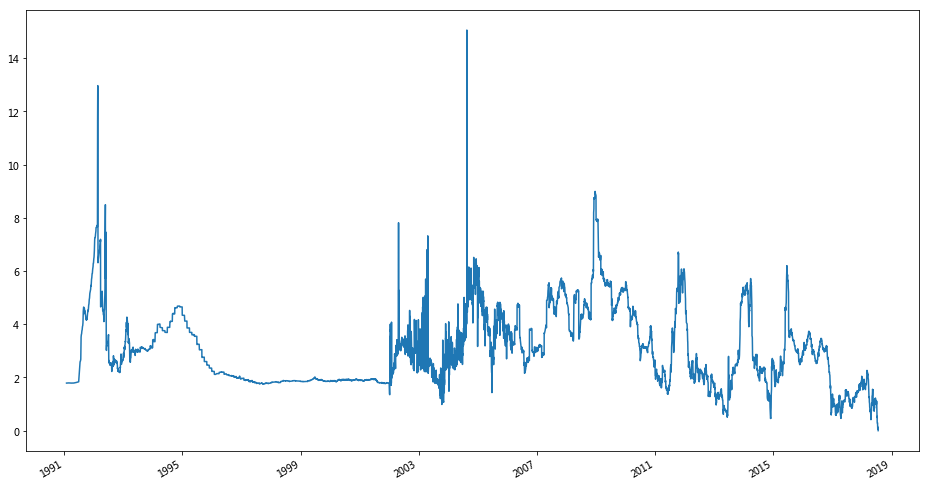

In [200]:
dist.plot(figsize=(16, 9))

In [201]:
dist.to_excel('./dist.xlsx')

# 聚类

In [233]:
K = 3
pca = PCA(n_components=K)

In [234]:
Xdf = pca.fit_transform(df)

In [235]:
Xdf = pd.DataFrame(Xdf, index=df.index, columns=range(K))

In [236]:
kmeans = KMeans(n_clusters=4)

In [237]:
kmeans.fit(Xdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [238]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [243]:
Xdf['label'] = kmeans.labels_

In [246]:
Xdf = Xdf.resample('M').mean()

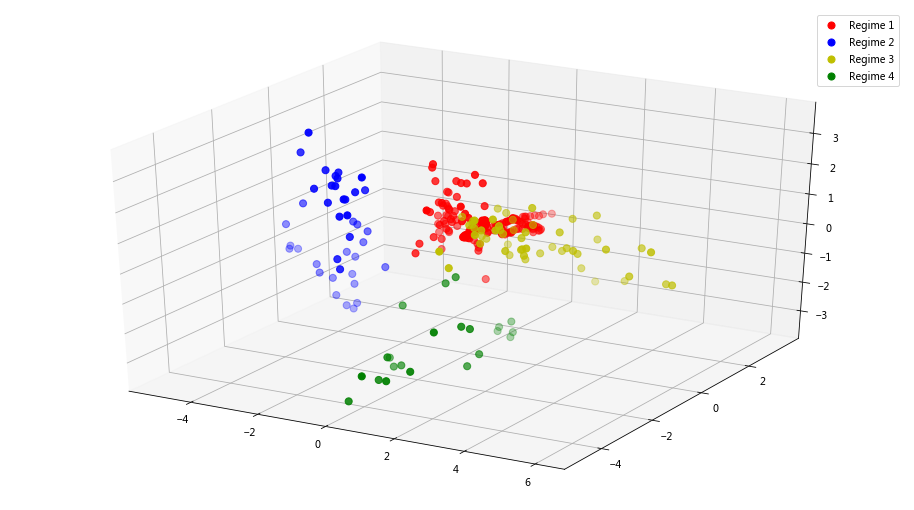

In [256]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(Xdf[0], Xdf[1], Xdf[2], c=Xdf['label'], s=50)
ax.scatter(Xdf[Xdf['label'] == 0][0], Xdf[Xdf['label'] == 0][1], Xdf[Xdf['label'] == 0][2], c='r', s=50, label='Regime 1')
ax.scatter(Xdf[Xdf['label'] == 1][0], Xdf[Xdf['label'] == 1][1], Xdf[Xdf['label'] == 1][2], c='b', s=50, label='Regime 2')
ax.scatter(Xdf[Xdf['label'] == 2][0], Xdf[Xdf['label'] == 2][1], Xdf[Xdf['label'] == 2][2], c='y', s=50, label='Regime 3')
ax.scatter(Xdf[Xdf['label'] == 3][0], Xdf[Xdf['label'] == 3][1], Xdf[Xdf['label'] == 3][2], c='g', s=50, label='Regime 4')
# ax.scatter(Xdf[Xdf['label'] == 4][0], Xdf[Xdf['label'] == 4][1], Xdf[Xdf['label'] == 4][2], c='gray', s=50, label='Regime 5')
# ax.scatter(Xdf.iloc[-1][0], Xdf.iloc[-1][1], Xdf.iloc[-1][2], c='r', marker='^', s=1000, label='Now')
plt.legend()

In [257]:
fig.savefig('plot.png', dpi=200, bbox_inches='tight')